In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Blue_Tokai_Weekly_Financials_2024byKanishka.xlsx to Blue_Tokai_Weekly_Financials_2024byKanishka.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("Blue_Tokai_Weekly_Financials_2024byKanishka.xlsx", engine='openpyxl')
df.head()


,Week Start Date,Week Number,Revenue (₹),Marketing Spend (₹),New Customers,Total Customers,Operating Expense (₹),ProfitPerWeek
0,2024-01-01,1,426036,79541,252,5252,295920,130116
1,2024-01-08,2,419066,88998,262,5514,276941,142125
2,2024-01-15,3,426445,86987,271,5785,266633,159812
3,2024-01-22,4,458874,77148,284,6069,283698,175176
4,2024-01-29,5,489309,78682,295,6364,292825,196484


In [10]:
#CAC calculation - customer acquisition cost CAC (Customer Acquisition Cost) is the average amount of money you spent to acquire one new customer.
total_spend = df['Marketing Spend (₹)'].sum()
total_new_customers = df['New Customers'].sum()

cac = total_spend / total_new_customers
print(f"Customer Acquisition Cost (CAC): ₹{cac:.2f}")

Customer Acquisition Cost (CAC): ₹251.84


In [12]:
#LTV = (Total Revenue / Total New Customers) × Assumed Lifespan.
# Total revenue
total_revenue = df['Revenue (₹)'].sum()

# Total new customers (you used this in CAC too)
total_new_customers = df['New Customers'].sum()

# Assumed customer lifespan (in months)
lifespan_months = 12
ltv = (total_revenue / total_new_customers) * lifespan_months
print(f"Customer Lifetime Value (LTV): ₹{ltv:.2f}")

Customer Lifetime Value (LTV): ₹14986.25


In [13]:
#ltv-cac ratio
ltv_cac_ratio = ltv / cac
print(f"LTV : CAC Ratio = {ltv_cac_ratio:.2f} : 1")
You earn ₹14,986.25 from a customer over their lifetime, while it only costs ₹251 to acquire them.

#This is incredible from a business profitability point of view — an LTV:CAC ratio of ~60:1 is extremely strong.

LTV : CAC Ratio = 59.51 : 1


In [15]:
#now let us see how cac changes every week by plotting graphs
#Weekly CAC = Marketing Spend / New Customers
df['Weekly CAC'] = df['Marketing Spend (₹)'] / df['New Customers']

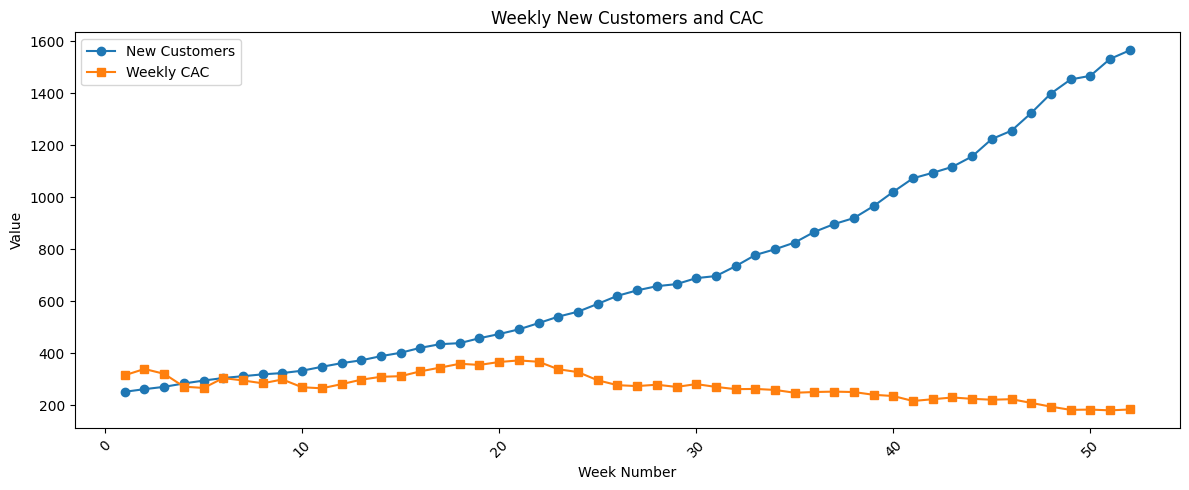

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot New Customers
plt.plot(df['Week Number'], df['New Customers'], label='New Customers', marker='o')

# Plot Weekly CAC
plt.plot(df['Week Number'], df['Weekly CAC'], label='Weekly CAC', marker='s')
plt.xticks(rotation=45)
plt.title('Weekly New Customers and CAC')
plt.xlabel('Week Number')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
#cohort analysis
# Convert Week column to datetime
import pandas as pd
import numpy as np

# Make sure 'Week Start Date' is datetime
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])

# Reset index and simplify
data = df[['Week Start Date', 'New Customers', 'Revenue (₹)']].copy()
data = data.sort_values('Week Start Date').reset_index(drop=True)

# Create a list of cohort start dates
cohorts = data['Week Start Date'].tolist()

# Create empty matrix
cohort_matrix = pd.DataFrame(index=cohorts, columns=range(0, len(data)))

# Fill cohort matrix
for i, cohort_date in enumerate(cohorts):
    cohort_customers = data.loc[i, 'New Customers']
    for j in range(i, len(data)):
        # Week offset
        week_number = j - i
        revenue = data.loc[j, 'Revenue (₹)']
        # Allocate revenue proportionally
        cohort_matrix.loc[cohort_date, week_number] = revenue / cohort_customers

# Convert all to float and fill NaNs with 0
cohort_matrix = cohort_matrix.astype(float).fillna(0)

# Preview the cohort retention matrix
cohort_matrix.head()


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
2024-01-01,1690.619048,1662.960317,1692.242063,1820.928571,1941.702381,1988.607143,1989.654762,1982.444444,1959.674603,1969.555556,...,4541.615079,4894.412698,5283.579365,5454.253968,5696.281746,6041.591270,6264.936508,6492.071429,6630.579365,6912.928571
2024-01-08,1599.488550,1627.652672,1751.427481,1867.591603,1912.706107,1913.713740,1906.778626,1884.877863,1894.381679,1848.629771,...,4707.603053,5081.916031,5246.076336,5478.866412,5810.996183,6025.816794,6244.282443,6377.503817,6649.076336,0.000000
2024-01-15,1573.597786,1693.261993,1805.568266,1849.184502,1850.158672,1843.453875,1822.280443,1831.468635,1787.236162,1913.088561,...,4913.143911,5071.852399,5296.911439,5618.011070,5825.697417,6036.907749,6165.704797,6428.258303,0.000000,0.000000
2024-01-22,1615.753521,1722.919014,1764.538732,1765.468310,1759.070423,1738.866197,1747.633803,1705.426056,1825.517606,1935.968310,...,4839.690141,5054.447183,5360.848592,5559.028169,5760.570423,5883.471831,6134.007042,0.000000,0.000000,0.000000
2024-01-29,1658.674576,1698.742373,1699.637288,1693.477966,1674.027119,1682.467797,1641.833898,1757.447458,1863.779661,1860.433898,...,4865.976271,5160.952542,5351.742373,5545.769492,5664.088136,5905.281356,0.000000,0.000000,0.000000,0.000000


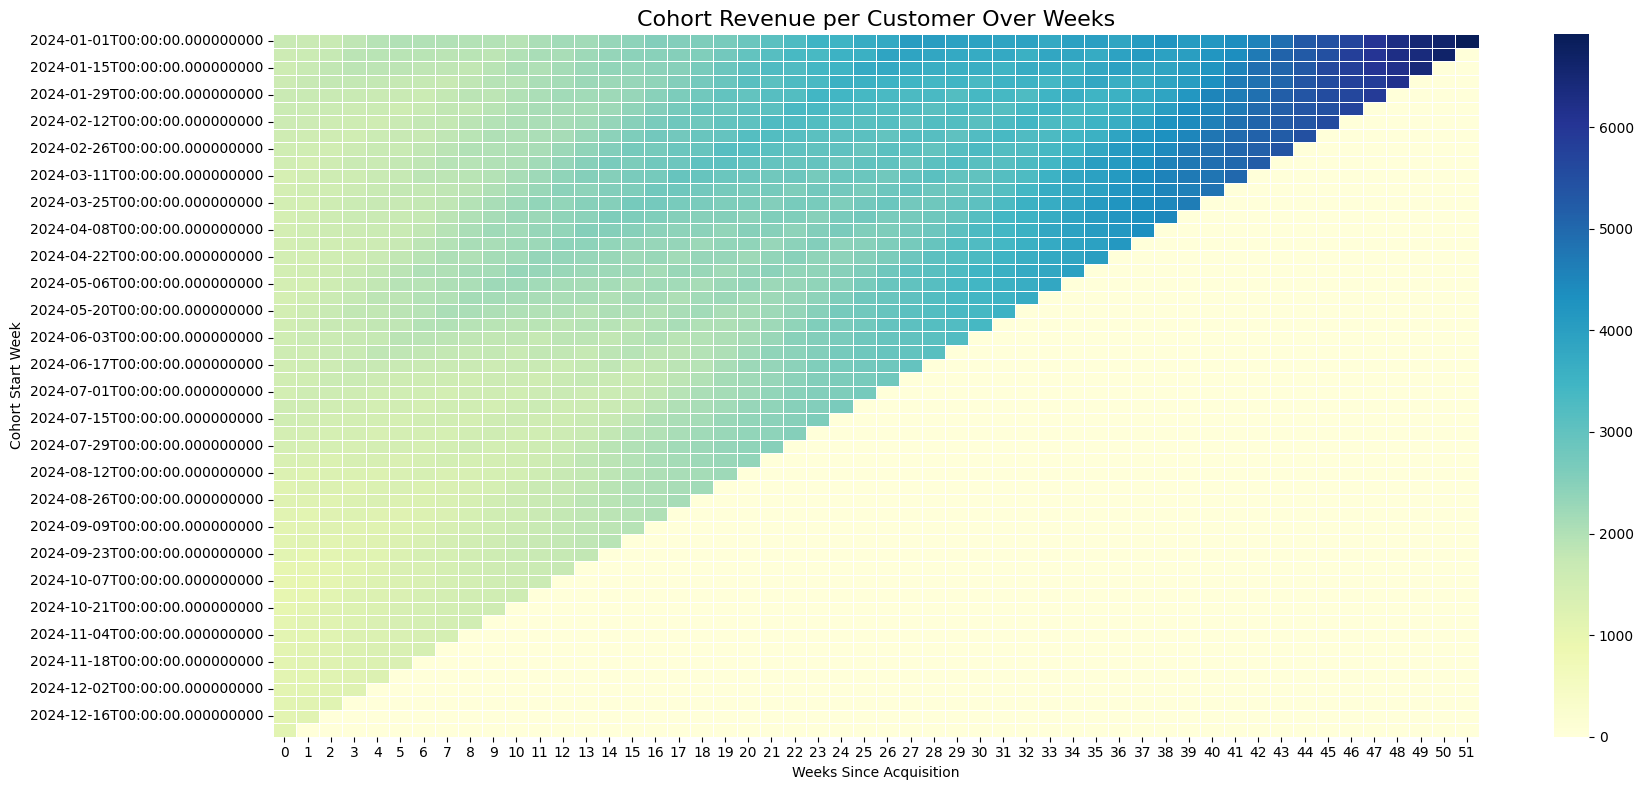

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
sns.heatmap(cohort_matrix, annot=False, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.title("Cohort Revenue per Customer Over Weeks", fontsize=16)
plt.xlabel("Weeks Since Acquisition")
plt.ylabel("Cohort Start Week")
plt.tight_layout()
plt.show()


What This Heatmap Shows:
Rows: Customer cohorts (based on the week they joined)

Columns: Weeks since they joined

Color intensity: Avg revenue per customer that week

Brighter = customers from that cohort are generating more revenue later → shows retention & valu